In [2]:
# Initial Setups and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal
import scipy.optimize as optimise

pd.plotting.register_matplotlib_converters()

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = "Ubuntu Mono"  

In [3]:
dataset = pd.read_csv('dataset.csv')

time = dataset['time']
velocity = dataset['velocity']

w = np.linspace(0.1, 10, 1000)

In [4]:
periodogram = signal.lombscargle(time, velocity, w, normalize=True, precenter=True)

wdom = w[np.argmax(periodogram)]

timeperiod =  2 * np.pi / wdom

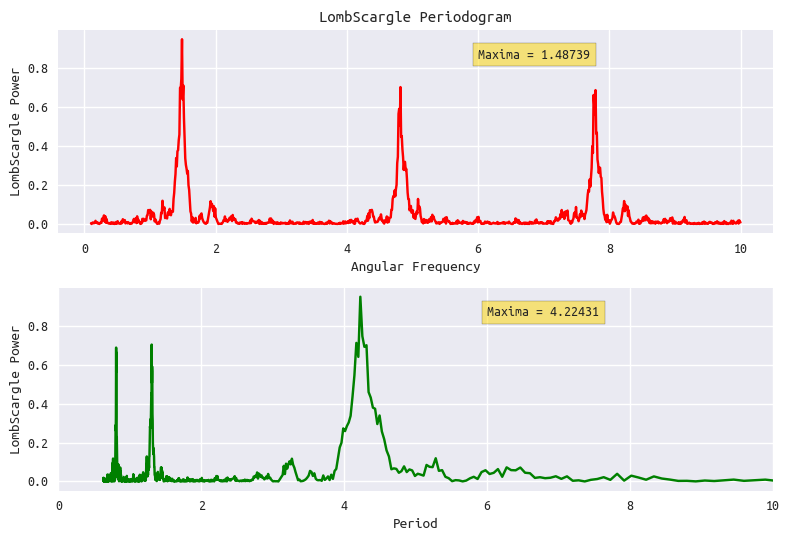

In [5]:
plt.subplot(211)

plt.plot(w, periodogram, c='r')
plt.xlabel("Angular Frequency")
plt.ylabel("LombScargle Power")
plt.title("LombScargle Periodogram")
plt.text(6,0.85,'Maxima = {:.5f}'.format(wdom), bbox = dict(facecolor = 'gold', alpha = 0.5))


plt.subplot(212)

plt.plot(2 * np.pi / w, periodogram, color='g')
plt.xlim(0, 10)
plt.xlabel("Period")
plt.ylabel("LombScargle Power")
plt.text(6,0.85,'Maxima = {:.5f}'.format(timeperiod),bbox = dict(facecolor = 'gold', alpha = 0.5))

plt.tight_layout()

In [6]:
def folding(array,timeperiod):
    """Returns the folded time array"""
    
    tarray = []
    
    for x in array:
        if x < timeperiod:
            tarray.append(x)
        else:
            while x > timeperiod:
                x -= timeperiod
            tarray.append(x)
            
    return tarray

In [7]:
tfolded = folding(time, timeperiod) 

(0.0, 4.2243099279039)

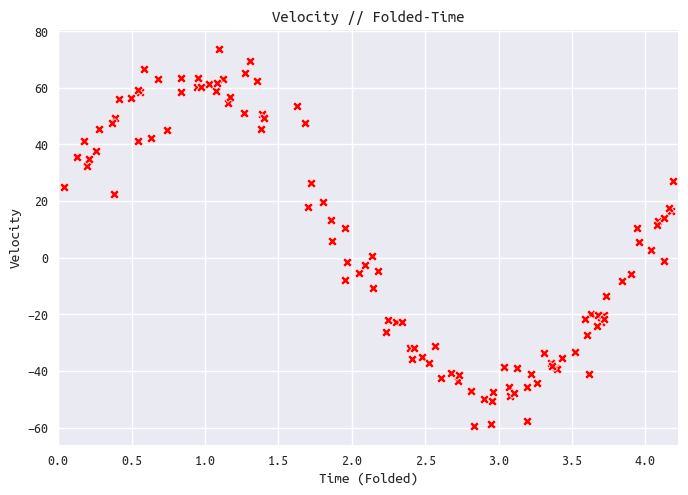

In [8]:
sns.scatterplot(x = tfolded,y = velocity,marker = "X",color = 'r')

plt.title('Velocity // Folded-Time')
plt.xlabel('Time (Folded)')
plt.ylabel('Velocity')

plt.xlim(0,timeperiod)

In [9]:
# Data

j = 1.396
x = -10
p = timeperiod * 86400
a = 3131006.710264267
e = 0.013

# Sine - Wave

th      = np.linspace(0, 4 * np.pi, 1000)
semiamp = 2 * np.pi * a * np.sin(j) / (p * np.sqrt(1 - e ** 2))
v       = semiamp * (np.cos(1*(th + x)) + e * np.cos(x))  

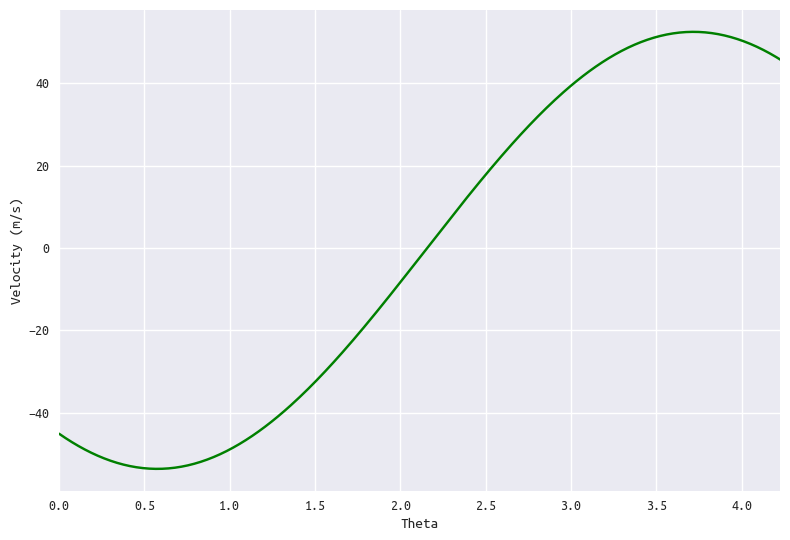

In [10]:
# Plotting
plt.plot(th, v, c='green')

plt.xlabel('Theta')
plt.ylabel('Velocity (m/s)')

plt.xlim(0,timeperiod)

plt.tight_layout()

(0.0, 4.2243099279039)

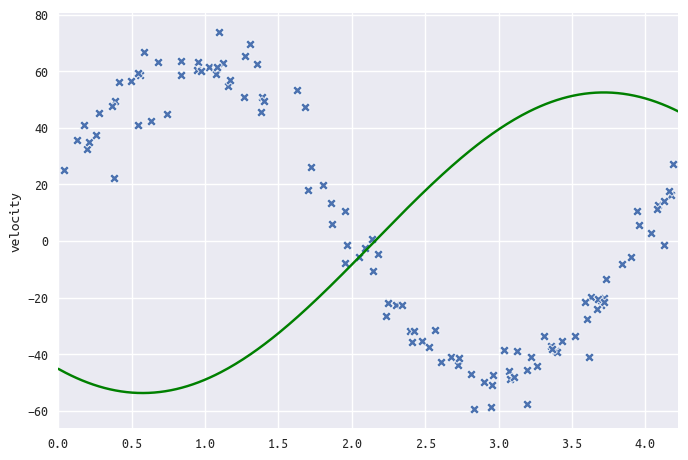

In [11]:
# Superimposing 
sns.scatterplot(x = tfolded,y = velocity, marker = 'X')

plt.plot(th, v, c = 'g')
plt.xlim(0, timeperiod)

(0.0, 4.2243099279039)

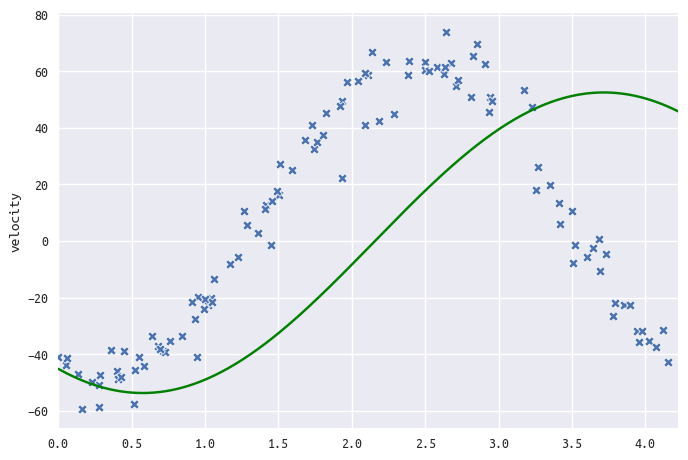

In [12]:
time_2 = [x - time.values[0] for x in time.values]
time_refolded = folding(time_2, timeperiod)

# Superimposing 
sns.scatterplot(x = time_refolded, y = velocity, marker = 'X')

plt.plot(th, v, c = 'g')

plt.xlim(0, timeperiod)

In [13]:
def f(x,a,b,c):
    return a * np.sin (x + c) + b

In [14]:
xdata = time_refolded
ydata = velocity

In [15]:
pct, pcov = optimise.curve_fit(f,xdata,ydata)

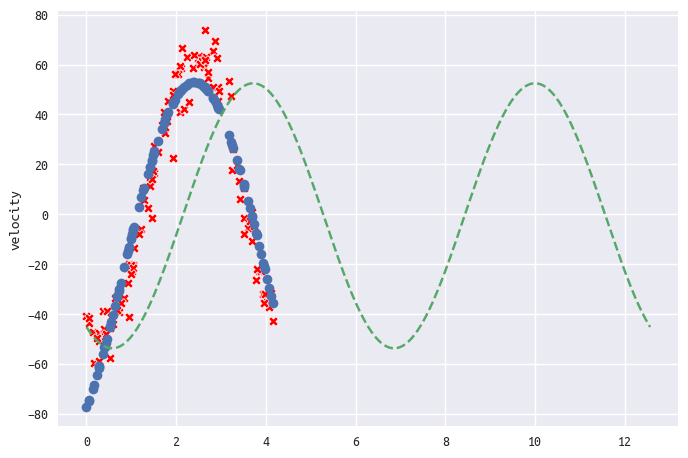

In [16]:
plt.plot(xdata, f(xdata, *pct),'o')
sns.scatterplot(x = xdata,y = velocity,marker = "X",color = 'r')
plt.plot(th, v, '--')
pl

In [17]:
pct

array([-74.91512125, -21.90795857, -10.25787905])